In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Histogram equalization

$s = (L - 1) \sum\limits_{j=0}^{k} p_r(r_j)$

In [93]:
def histogram_equalize(img):
    hist, bins = np.histogram(img.flatten(), 256, (0, 256))

    cdf = hist.cumsum()
    T = 255 * cdf / cdf[-1]

    eqz = np.interp(img.flatten(), bins[:-1], T)

    return eqz.reshape(img.shape)

In [94]:
def plot_sideways_with_histogram(original, equalized):
    fig, axes = plt.subplots(nrows=2, ncols=2)

    axes[0, 0].set_title('Original')
    axes[0, 0].imshow(original, cmap='grey')
    axes[1, 0].hist(original.flatten(), 256, [0,256], color='r')

    axes[0, 1].set_title('Equalized')
    axes[0, 1].imshow(equalized, cmap='grey')
    axes[1, 1].hist(equalized.flatten(), 256, [0, 256], color='r')

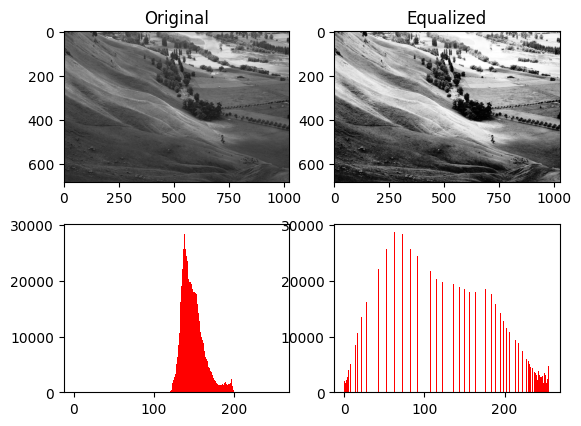

In [104]:
img = cv2.imread('data/unequalized.jpg', 0)
eqz = histogram_equalize(img)
plot_sideways_with_histogram(img, eqz)

### Histogram matching

Take an input pixel r. Ask yourself what the percentile of r is (in the source image's histogram). What value has the same percentile in the reference image? That will be z.

$z = G^{-1}[T(r)]$ <br>
where $T(r)$ and $G(z)$ are the histogram-equalization function for the source image and reference image respectively.

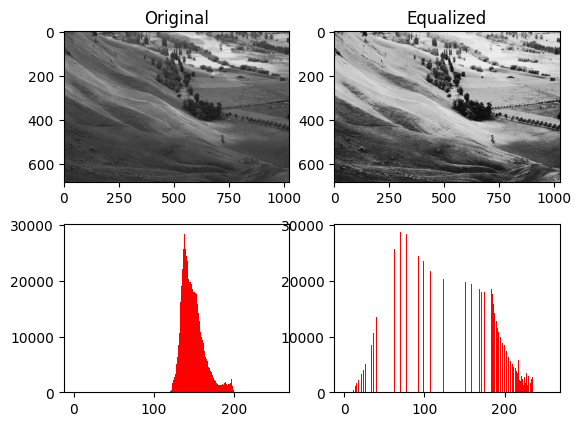

In [111]:
from skimage.exposure import match_histograms

roger = cv2.imread('data/roger.jpg', 0)
matched = match_histograms(img, roger)
plot_sideways_with_histogram(img, matched)